# Mode propagation

In this notebook, I will test the mode propagation in fibers.

Specifically,

(1) Single mode propagation in multimode GRIN fiber 

(2) Two mode propagation in multimode GRIN fiber

(3) Multi modes propagation in multimode GRIN fiber

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from src.util import plot_index_profile, plot_beam_intensity, plot_beam_phase, plot_mode_evolution
from src.simulation import Domain, Fiber, Input, run
from src.modes import calculate_modes, decompose_modes, n_to_lm

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
np.random.seed(40)

## Define the fiber paramters

In [41]:
c = 299792458
n_core = 1.47
n_clad = 1.457

print(f'NA = {np.sqrt(n_core**2 - n_clad**2)}')

wvl0 = 1064e-9 # Wavelength (meter)
radius = 26e-6
Lx, Ly = 100e-6, 100e-6
Nx, Ny = 256, 256
total_z = 1e-4
dz = 1e-7
n2 = 2.3e-20

intensity = 1.0
amp = np.sqrt(intensity)

NA = 0.1950666552745481


In [42]:
domain = Domain(Lx, Ly, Nx, Ny, device=device)
fiber = Fiber(domain, n_core, n_clad, total_z, dz, n2=n2, radius=radius, device=device)

### Input beam generation -- fundamental mode

In [43]:
input_beam = Input(domain, wvl0, n_core, n_clad, type="mode", amp=1.0, l=0, m=1, radius=radius, device=device)

In [44]:
input_beam.beta

8675599.928645672

### Plot intensity and phase at starting point

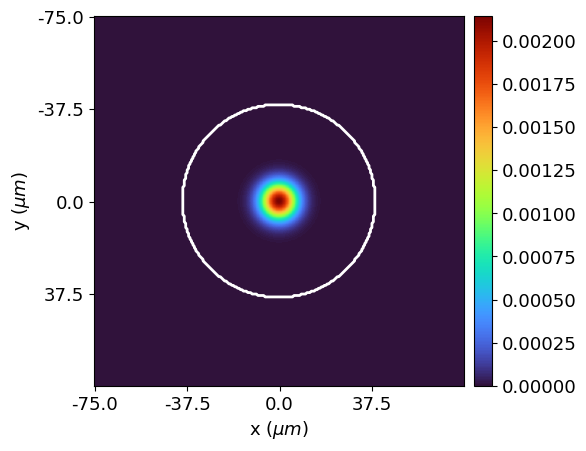

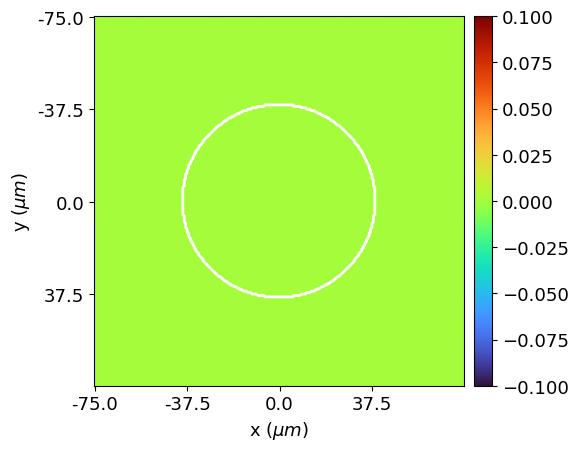

In [45]:
input_beam_field = input_beam.field.cpu().numpy()
indices = fiber.n.cpu().numpy()
plot_beam_intensity(input_beam_field, indices)
plot_beam_phase(input_beam_field, indices)

### Propagation 1 mm in the GRIN fiber

In [46]:
output, fields, energies = run(domain, input_beam, fiber, wvl0, dz=dz, mode_decompose=False, nonlinear=False)

Simulating propagation: 100%|██████████| 1000/1000 [00:00<00:00, 2588.38it/s]


### Plot Intensity and the phase of the output

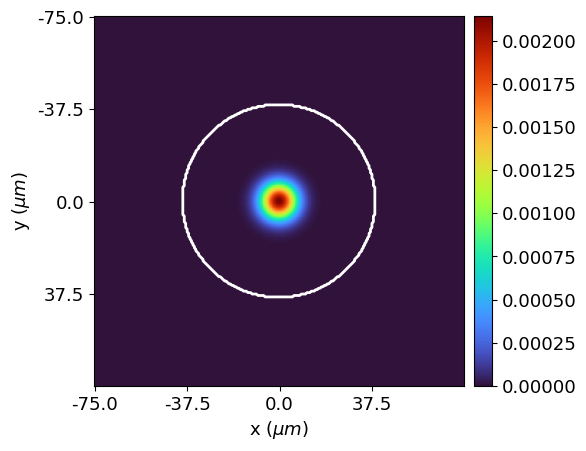

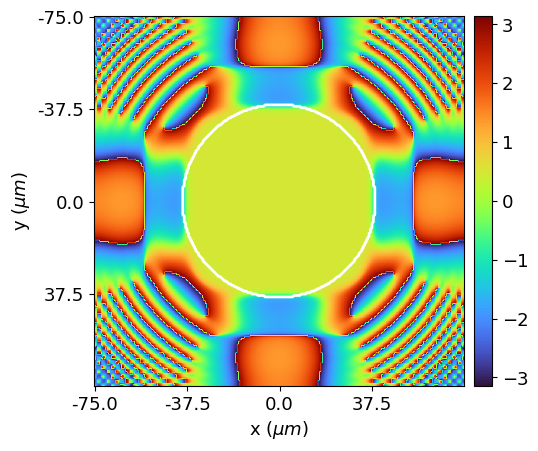

In [47]:
output_beam_field = output.cpu().numpy()

plot_beam_intensity(output_beam_field, indices)
plot_beam_phase(output_beam_field, indices)

In [ ]:
output_analytic = input_beam_field * np.exp(1j * input_beam.beta * total_z)

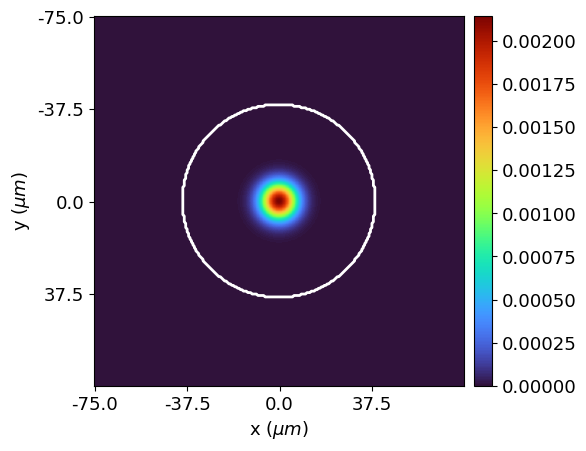

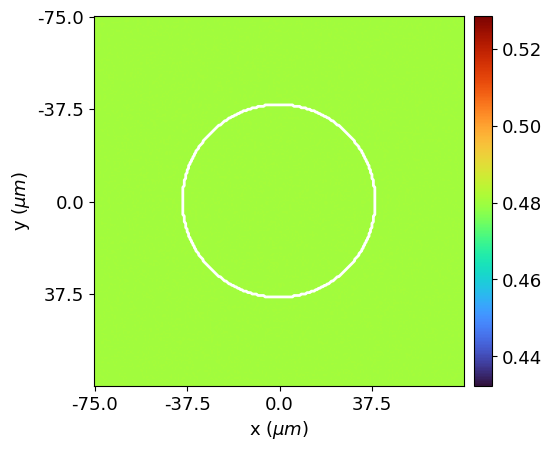

In [49]:
plot_beam_intensity(output_analytic, indices)
plot_beam_phase(output_analytic, indices)

In [50]:
np.angle(output_beam_field[128, 128]), np.angle(output_analytic[128, 128])

(0.4769985318740811, 0.480420473784287)

In [ ]:
l = 0
m = 1
k0 = 2 * np.pi / wvl0
Delta = (n_core - n_clad) / n_core

beta1 = n_core * k0 * np.sqrt(1 - (2 * (2*m + l - 1))/ n_core / k0 / radius * np.sqrt(2*Delta))
beta2 = n_core * k0 - (2*m + l - 1) * np.sqrt(2*Delta)/radius

print(f'beta1 = {beta1}')
print(f'beta2 = {beta2}')
print(f'input beam beta = {input_beam.beta}')
print(f'k = {k0 * n_core}')